<a href="https://colab.research.google.com/github/khixson1/Deep_Learning_Housing_Price_Model/blob/main/Deep_Learning_Housing_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Deep Learning House Price Prediction Model

Kim Hixson

## Part 1, Step 1: Load the dataset

In [1]:
# Mount google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Install TensorFlow library
%%capture
!pip install tensorflow

In [3]:
# Import libraries

#import the basics
import pandas as pd
import numpy as np

#import seaborn and matplotlib to make a nice visualizations
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import tensorflow as tf

#imports needed for k-means clustering and visualization
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from mpl_toolkits import mplot3d
from sklearn.metrics import silhouette_score

#imports for pipelines and dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline

#imports needed for deep learning model
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras import optimizers

#imports for evaluation of linear regression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#import for visualizing pipelines
from sklearn import set_config
set_config(display='diagram')

In [4]:
# Load the dataset adding file path
filename = 'option_A_clustering_df.csv'
df = pd.read_csv(filename)
df.head()

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,...,SqFtEnclosedPorch,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Longitude,Latitude
0,400000,1590,0,0,0,3180,1590,1590,0,600,...,0,220,0,6,0,2,1,1965,-122.196399,47.336118
1,474250,1390,0,0,0,2200,810,810,0,0,...,0,340,0,4,1,0,1,1945,-122.361913,47.509874
2,667950,1010,0,1515,0,2525,0,0,0,400,...,0,0,0,4,1,0,2,2019,-122.156684,47.437557
3,659000,660,0,540,0,1820,620,620,0,0,...,0,100,0,3,1,0,2,2016,-122.370252,47.565146
4,656500,2310,0,0,0,2310,0,0,0,440,...,0,320,0,3,0,0,2,1967,-122.184194,47.730389


## Part 1, Step 2: Explore the data and clean as needed

In [5]:
# Explore dataset dimensions, categories, datatypes (numeric and categorical), missing data, statistics looking for possible outliers/oddities

display(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4944 entries, 0 to 4943
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SalePrice           4944 non-null   int64  
 1   SqFt1stFloor        4944 non-null   int64  
 2   SqFtHalfFloor       4944 non-null   int64  
 3   SqFt2ndFloor        4944 non-null   int64  
 4   SqFtUpperFloor      4944 non-null   int64  
 5   SqFtTotLiving       4944 non-null   int64  
 6   SqFtTotBasement     4944 non-null   int64  
 7   SqFtFinBasement     4944 non-null   int64  
 8   SqFtGarageBasement  4944 non-null   int64  
 9   SqFtGarageAttached  4944 non-null   int64  
 10  DaylightBasement    4944 non-null   int64  
 11  SqFtOpenPorch       4944 non-null   int64  
 12  SqFtEnclosedPorch   4944 non-null   int64  
 13  SqFtDeck            4944 non-null   int64  
 14  BrickStone          4944 non-null   int64  
 15  Bedrooms            4944 non-null   int64  
 16  BathHa

None

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,...,SqFtEnclosedPorch,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Longitude,Latitude
count,4.944000e+03,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,...,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000,4944.000000
mean,6.643497e+05,1175.502832,51.758495,349.306837,26.994134,1935.205097,595.065939,334.273463,102.417071,170.282160,...,8.271238,148.908576,4.415858,3.375607,0.387743,0.628236,1.319579,1972.183455,-122.271891,47.572471
std,2.978080e+05,446.398643,174.464172,544.632918,115.331907,764.888792,567.175862,422.825946,187.119944,239.635895,...,37.449815,201.636086,18.643753,0.947061,0.506022,0.651598,0.609963,32.905503,0.086519,0.127187
min,6.000000e+04,260.000000,0.000000,0.000000,0.000000,300.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900.000000,-122.526072,47.213547
25%,4.500000e+05,880.000000,0.000000,0.000000,0.000000,1390.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,1.000000,1952.000000,-122.346573,47.488749
50%,6.305500e+05,1170.000000,0.000000,0.000000,0.000000,1770.000000,560.000000,110.000000,0.000000,0.000000,...,0.000000,50.000000,0.000000,3.000000,0.000000,1.000000,1.000000,1967.000000,-122.291976,47.576939
75%,7.886125e+05,1450.000000,0.000000,580.000000,0.000000,2360.000000,1070.000000,570.000000,190.000000,400.000000,...,0.000000,257.000000,0.000000,4.000000,1.000000,1.000000,2.000000,2016.000000,-122.192528,47.681099
max,1.998000e+06,3600.000000,2000.000000,3010.000000,1220.000000,6695.000000,3070.000000,2620.000000,1090.000000,1830.000000,...,620.000000,1940.000000,100.000000,8.000000,3.000000,4.000000,5.000000,2019.000000,-122.090088,47.777422


In [6]:
# Check dataset column names for spaces or other oddities
df.columns

Index(['SalePrice', 'SqFt1stFloor', 'SqFtHalfFloor', 'SqFt2ndFloor',
       'SqFtUpperFloor', 'SqFtTotLiving', 'SqFtTotBasement', 'SqFtFinBasement',
       'SqFtGarageBasement', 'SqFtGarageAttached', 'DaylightBasement',
       'SqFtOpenPorch', 'SqFtEnclosedPorch', 'SqFtDeck', 'BrickStone',
       'Bedrooms', 'BathHalfCount', 'Bath3qtrCount', 'BathFullCount',
       'YrBuilt', 'Longitude', 'Latitude'],
      dtype='object')

In [7]:
# Check for duplicates
df.duplicated().sum()

29

In [8]:
# Remove duplicated rows
df = df.drop_duplicates()
df.duplicated().sum()

0

In [9]:
# Double check for missing data
df.isnull().sum()

SalePrice             0
SqFt1stFloor          0
SqFtHalfFloor         0
SqFt2ndFloor          0
SqFtUpperFloor        0
SqFtTotLiving         0
SqFtTotBasement       0
SqFtFinBasement       0
SqFtGarageBasement    0
SqFtGarageAttached    0
DaylightBasement      0
SqFtOpenPorch         0
SqFtEnclosedPorch     0
SqFtDeck              0
BrickStone            0
Bedrooms              0
BathHalfCount         0
Bath3qtrCount         0
BathFullCount         0
YrBuilt               0
Longitude             0
Latitude              0
dtype: int64

In [10]:
# View number of distinct data groups for each column
df.nunique()

SalePrice             1676
SqFt1stFloor           304
SqFtHalfFloor          114
SqFt2ndFloor           235
SqFtUpperFloor          58
SqFtTotLiving          455
SqFtTotBasement        224
SqFtFinBasement        194
SqFtGarageBasement      86
SqFtGarageAttached     134
DaylightBasement         2
SqFtOpenPorch          109
SqFtEnclosedPorch       43
SqFtDeck               141
BrickStone              37
Bedrooms                 9
BathHalfCount            4
Bath3qtrCount            5
BathFullCount            6
YrBuilt                120
Longitude             4722
Latitude              4710
dtype: int64

Note: Dataset is all numeric data. There appear to be no missing values, no obvious oddities (e.g., strings in numeric columns), dataset contains 22 columns and 4944 rows. Every column is an integer except for longitude and latitude which makes sense. Statistics on data appear to be reasonable for each column with no obvious outliers. Duplicated rows have been removed from the dataset. DaylightBasement category is binomial (0=False, 1=True).

### Part 1, Step 3: Prepare the data for modeling

In [11]:
# Numeric data needs to be scaled for best results using K-means clustering
# instantiate the scaler and fit and transform data
scaler = StandardScaler()

# fit and transform data and view scaled data
df_scale = pd.DataFrame(scaler.fit_transform(df), columns=scaler.feature_names_in_)
df_scale
display(df_scale.info())
display(df_scale.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SalePrice           4915 non-null   float64
 1   SqFt1stFloor        4915 non-null   float64
 2   SqFtHalfFloor       4915 non-null   float64
 3   SqFt2ndFloor        4915 non-null   float64
 4   SqFtUpperFloor      4915 non-null   float64
 5   SqFtTotLiving       4915 non-null   float64
 6   SqFtTotBasement     4915 non-null   float64
 7   SqFtFinBasement     4915 non-null   float64
 8   SqFtGarageBasement  4915 non-null   float64
 9   SqFtGarageAttached  4915 non-null   float64
 10  DaylightBasement    4915 non-null   float64
 11  SqFtOpenPorch       4915 non-null   float64
 12  SqFtEnclosedPorch   4915 non-null   float64
 13  SqFtDeck            4915 non-null   float64
 14  BrickStone          4915 non-null   float64
 15  Bedrooms            4915 non-null   float64
 16  BathHa

None

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,...,SqFtEnclosedPorch,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Longitude,Latitude
0,-0.886106,0.923656,-0.297264,-0.637725,-0.23133,1.623007,1.749140,2.962367,-0.546329,1.788670,...,-0.21969,0.354131,-0.237616,2.770511,-0.766251,2.104538,-0.524838,-0.210761,0.869736,-1.854932
1,-0.637402,0.474097,-0.297264,-0.637725,-0.23133,0.342942,0.375708,1.121238,-0.546329,-0.712267,...,-0.21969,0.949368,-0.237616,0.656060,1.209680,-0.961655,-0.524838,-0.820269,-1.043917,-0.490331
2,0.011407,-0.380065,-0.297264,2.143060,-0.23133,0.767453,-1.050548,-0.790705,-0.546329,0.955024,...,-0.21969,-0.737137,-0.237616,0.656060,1.209680,-0.961655,1.114030,1.434912,1.328909,-1.058280
3,-0.018571,-1.166792,-0.297264,0.353446,-0.23133,-0.153410,0.041154,0.672757,-0.546329,-0.712267,...,-0.21969,-0.241106,-0.237616,-0.401165,1.209680,-0.961655,1.114030,1.343485,-1.140326,-0.056249
4,-0.026945,2.542067,-0.297264,-0.637725,-0.23133,0.486623,-1.050548,-0.790705,-0.546329,1.121753,...,-0.21969,0.850162,-0.237616,-0.401165,-0.766251,-0.961655,1.114030,-0.149810,1.010839,1.241497


### Part 1, Step 4: Use a KMeans model to cluster the houses into an optimal number of clusters.
1. Use an elbow plot and silhouette score to find the optimal number of clusters.


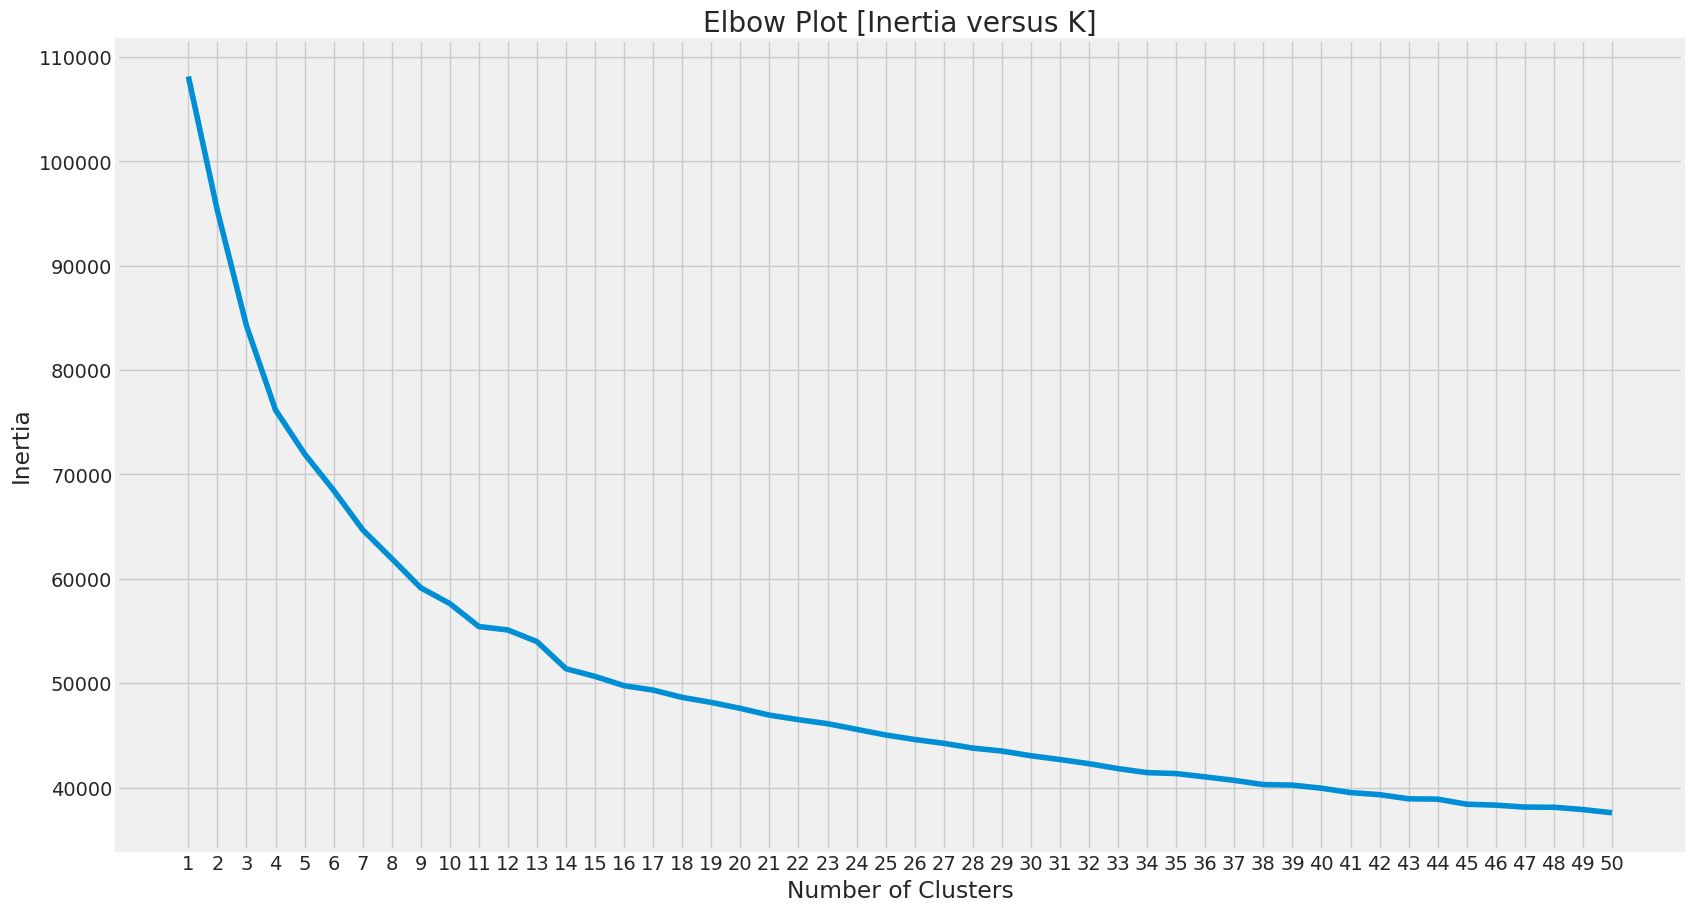

In [56]:
# View best k using elbow plot

# define a range of values of k to evaluate for inertia, fit and run the model, and plot the results
ks = range(1, 51, 1)

km_kwargs = {"init": "random",
            "n_init": 10,
            "max_iter": 300,
            "random_state": 42,
             }

# a list holds the SSE values for each k
inertias = []
for k in ks:
     km = KMeans(n_clusters=k, **km_kwargs)
     km.fit(df_scale)
     inertias.append(km.inertia_)

# plot sse
plt.figure(figsize=(18,10))
plt.style.use("fivethirtyeight")
plt.plot(ks, inertias)
plt.xticks(ks)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title('Elbow Plot [Inertia versus K]')
plt.show()

Note: The Elbow Plot suggests that an ideal number of clusters is between 4 and 10

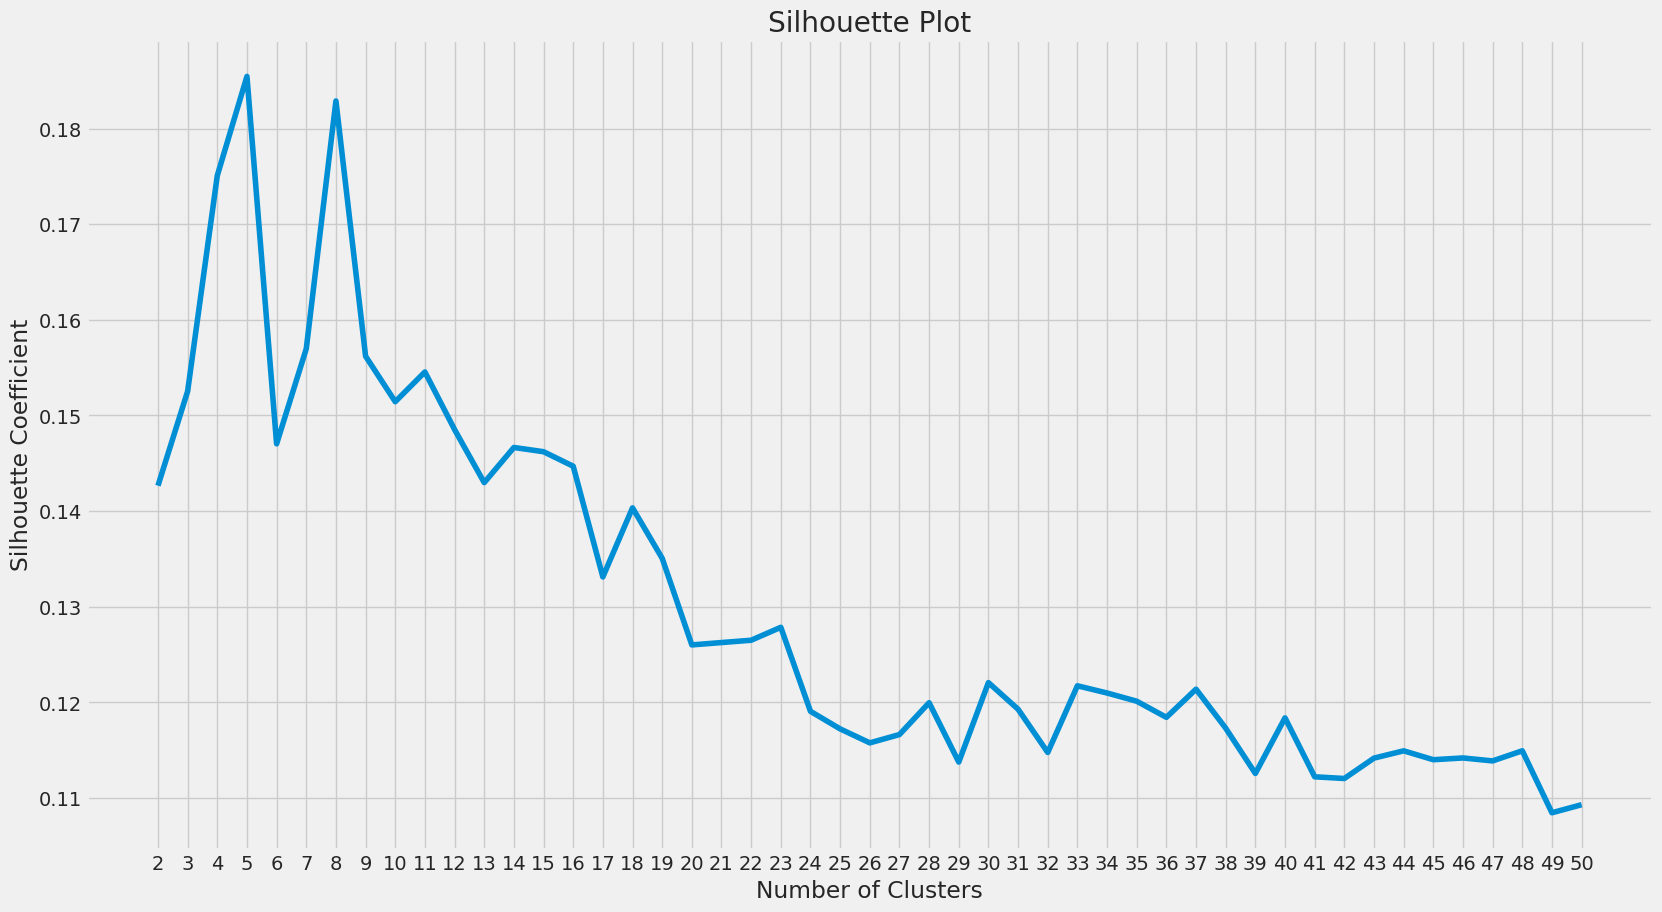

In [58]:
# plot silhouette score to determine best k
# define a range of values of k to evaluate for silhouette score, fit and run the model, and plot the results
ks = range(2, 51, 1)

# list holds the silhouette score values for each k
sil_c = []

# Notice you start at 2 clusters for silhouette coefficient
for k in ks:
     km = KMeans(n_clusters=k, **km_kwargs)
     km.fit(df_scale)
     score = silhouette_score(df_scale, km.labels_)
     sil_c.append(score)

# make plot
plt.figure(figsize=(18,10))
plt.style.use("fivethirtyeight")
plt.plot(ks, sil_c)
plt.xticks(ks)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.title('Silhouette Plot')
plt.show()

Note: The Silhouette Plot indicates that 5 is the ideal number of clusters. I will use 5 clusters as the silhouette coefficient was highest for n_clusters = 5.

In [14]:
# instantiate a Kmeans model with the value for k based on elbow plot method and silhouette score
# instantiate kmeans
km = KMeans(init='random', n_clusters=5, n_init=10, max_iter=300, random_state=42)

# fit the algorithm to the data
km.fit(df_scale)
df1_scale_km = pd.DataFrame(df_scale, columns=km.feature_names_in_)
df1_scale_km

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,...,SqFtEnclosedPorch,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Longitude,Latitude
0,-0.886106,0.923656,-0.297264,-0.637725,-0.231330,1.623007,1.749140,2.962367,-0.546329,1.788670,...,-0.21969,0.354131,-0.237616,2.770511,-0.766251,2.104538,-0.524838,-0.210761,0.869736,-1.854932
1,-0.637402,0.474097,-0.297264,-0.637725,-0.231330,0.342942,0.375708,1.121238,-0.546329,-0.712267,...,-0.21969,0.949368,-0.237616,0.656060,1.209680,-0.961655,-0.524838,-0.820269,-1.043917,-0.490331
2,0.011407,-0.380065,-0.297264,2.143060,-0.231330,0.767453,-1.050548,-0.790705,-0.546329,0.955024,...,-0.21969,-0.737137,-0.237616,0.656060,1.209680,-0.961655,1.114030,1.434912,1.328909,-1.058280
3,-0.018571,-1.166792,-0.297264,0.353446,-0.231330,-0.153410,0.041154,0.672757,-0.546329,-0.712267,...,-0.21969,-0.241106,-0.237616,-0.401165,1.209680,-0.961655,1.114030,1.343485,-1.140326,-0.056249
4,-0.026945,2.542067,-0.297264,-0.637725,-0.231330,0.486623,-1.050548,-0.790705,-0.546329,1.121753,...,-0.21969,0.850162,-0.237616,-0.401165,-0.766251,-0.961655,1.114030,-0.149810,1.010839,1.241497
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4910,0.470464,0.181884,-0.297264,-0.637725,-0.231330,0.094766,0.780694,0.979612,-0.546329,-0.712267,...,-0.21969,3.181508,-0.237616,-0.401165,-0.766251,-0.961655,1.114030,-0.545991,-0.095835,1.106407
4911,0.637942,1.081001,-0.297264,-0.637725,-0.231330,1.466264,1.414586,2.513887,-0.546329,-0.712267,...,-0.21969,1.048574,-0.237616,1.713286,-0.766251,0.571441,1.114030,-0.728843,-0.042953,0.954446
4912,-0.031969,0.294273,-0.297264,-0.637725,-0.231330,-0.453834,1.220897,-0.129786,1.001895,-0.003668,...,-0.21969,-0.241106,-0.237616,0.656060,-0.766251,2.104538,-0.524838,0.215895,0.615950,1.240693
4913,0.889159,0.271796,-0.297264,-0.637725,-0.231330,0.865417,1.238505,2.277845,-0.546329,-0.712267,...,-0.21969,-0.737137,5.111784,-0.401165,-0.766251,-0.961655,1.114030,-0.728843,-1.286261,-0.009662


###Part 1, Step 5: Analyze and report on the clusters.
1. Create 2 report quality explanatory visualizations showing important differences between the clusters.
2. Interpret and explain each visualization.

In [15]:
# add a column to the dataframe to add a cluster label feature to dataset

# define cluster dataframe
df['cluster'] = km.labels_
df.head()

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,...,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Longitude,Latitude,cluster
0,400000,1590,0,0,0,3180,1590,1590,0,600,...,220,0,6,0,2,1,1965,-122.196399,47.336118,3
1,474250,1390,0,0,0,2200,810,810,0,0,...,340,0,4,1,0,1,1945,-122.361913,47.509874,3
2,667950,1010,0,1515,0,2525,0,0,0,400,...,0,0,4,1,0,2,2019,-122.156684,47.437557,2
3,659000,660,0,540,0,1820,620,620,0,0,...,100,0,3,1,0,2,2016,-122.370252,47.565146,4
4,656500,2310,0,0,0,2310,0,0,0,440,...,320,0,3,0,0,2,1967,-122.184194,47.730389,1


In [16]:
# Investigate each of the clusters
# median is used here so that columns such as bedrooms and bathrooms do not show fractions but integer values
cluster_groups = df.groupby('cluster').median()
cluster_groups

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,...,SqFtEnclosedPorch,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Longitude,Latitude
cluster,,,,,,,,,,,,,,,,,,,,,
0,736000.0,1260.0,0.0,0.0,0.0,2060.0,1130.0,420.0,0.0,0.0,...,0.0,0.0,100.0,3.0,0.0,0.0,1.0,1949.0,-122.314222,47.637540
1,485000.0,1130.0,0.0,0.0,0.0,1410.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,1.0,1952.0,-122.300015,47.556600
2,774950.0,1310.0,0.0,1462.0,0.0,2975.0,0.0,0.0,0.0,470.0,...,0.0,0.0,0.0,4.0,1.0,1.0,2.0,2016.0,-122.170711,47.508895
3,650000.0,1350.0,0.0,0.0,0.0,2210.0,1210.0,780.0,240.0,0.0,...,0.0,160.0,0.0,4.0,0.0,1.0,1.0,1966.0,-122.253854,47.578744
4,688000.0,540.0,0.0,530.0,0.0,1500.0,450.0,310.0,0.0,0.0,...,0.0,320.0,0.0,3.0,1.0,1.0,1.0,2017.0,-122.346981,47.603897


In [17]:
# Investigate each of the clusters
# mean is calculated here for viewing the average value of the price, square footage, and % Brick/Stone
cluster_groups2 = df.groupby('cluster').mean()
cluster_groups2

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,...,SqFtEnclosedPorch,SqFtDeck,BrickStone,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,YrBuilt,Longitude,Latitude
cluster,,,,,,,,,,,,,,,,,,,,,
0,800569.378238,1308.393782,129.222798,104.507772,10.310881,2074.663212,1030.466321,523.937824,135.233161,89.585492,...,4.766839,98.393782,92.979275,3.222798,0.352332,0.523316,1.176166,1947.637306,-122.313914,47.609316
1,529801.866595,1199.168908,92.032275,67.536310,0.000000,1434.998924,346.765465,80.801506,25.970952,159.114040,...,7.880581,67.279720,0.843464,3.026896,0.207639,0.285637,1.096288,1947.474987,-122.283743,47.554727
2,872449.639831,1375.221751,30.889831,1399.980226,9.307910,2962.275424,208.494350,147.621469,28.895480,471.535311,...,5.070621,90.925141,0.360169,4.227401,0.673729,0.632768,2.048023,2003.652542,-122.197298,47.546035
3,700837.236446,1411.692771,24.278614,82.737952,0.000000,2323.926205,1228.908886,805.367470,243.722892,138.649849,...,6.048946,206.612199,1.554217,3.831325,0.403614,0.942771,1.316265,1965.337349,-122.250171,47.578234
4,699416.967352,562.315599,6.339782,557.292624,147.264813,1536.906892,374.007255,267.320435,102.137848,10.662636,...,16.070133,299.377267,0.000000,2.756953,0.530834,0.908102,1.240629,2015.915357,-122.332590,47.616170


Analysis: From the tabel view of the median and mean values in each cluster.
1. Cluster 0 and 1 are the oldest homes
2. Cluster 0 contain the homes with the most brick and stone
3. Clusters 0 and 2 are the most expensive homes
4. Cluster 2 has the largest upper floor square footage
5. Cluster 2 has the most bathrooms
6. Clusters 2 and 3 have the greatest number of bathrooms
7. Cluster 1 contains the least expensive homes
8. Cluster 1 has the smallest average square feet but has much larger attached garages than cluster 4 houses which are also relatively less expensive
9. Clusters 1 and 3 contain homes with no upper floors
10. Clusters 3 and 4 have the largest square footage decks
11. Cluster 4 contains homes with the smallest attached garages and small square footage overall.
12. Cluster 4 has the largest enclosed porches
13. Cluster 4 are the newest homes and cluster 2 are also fairly new

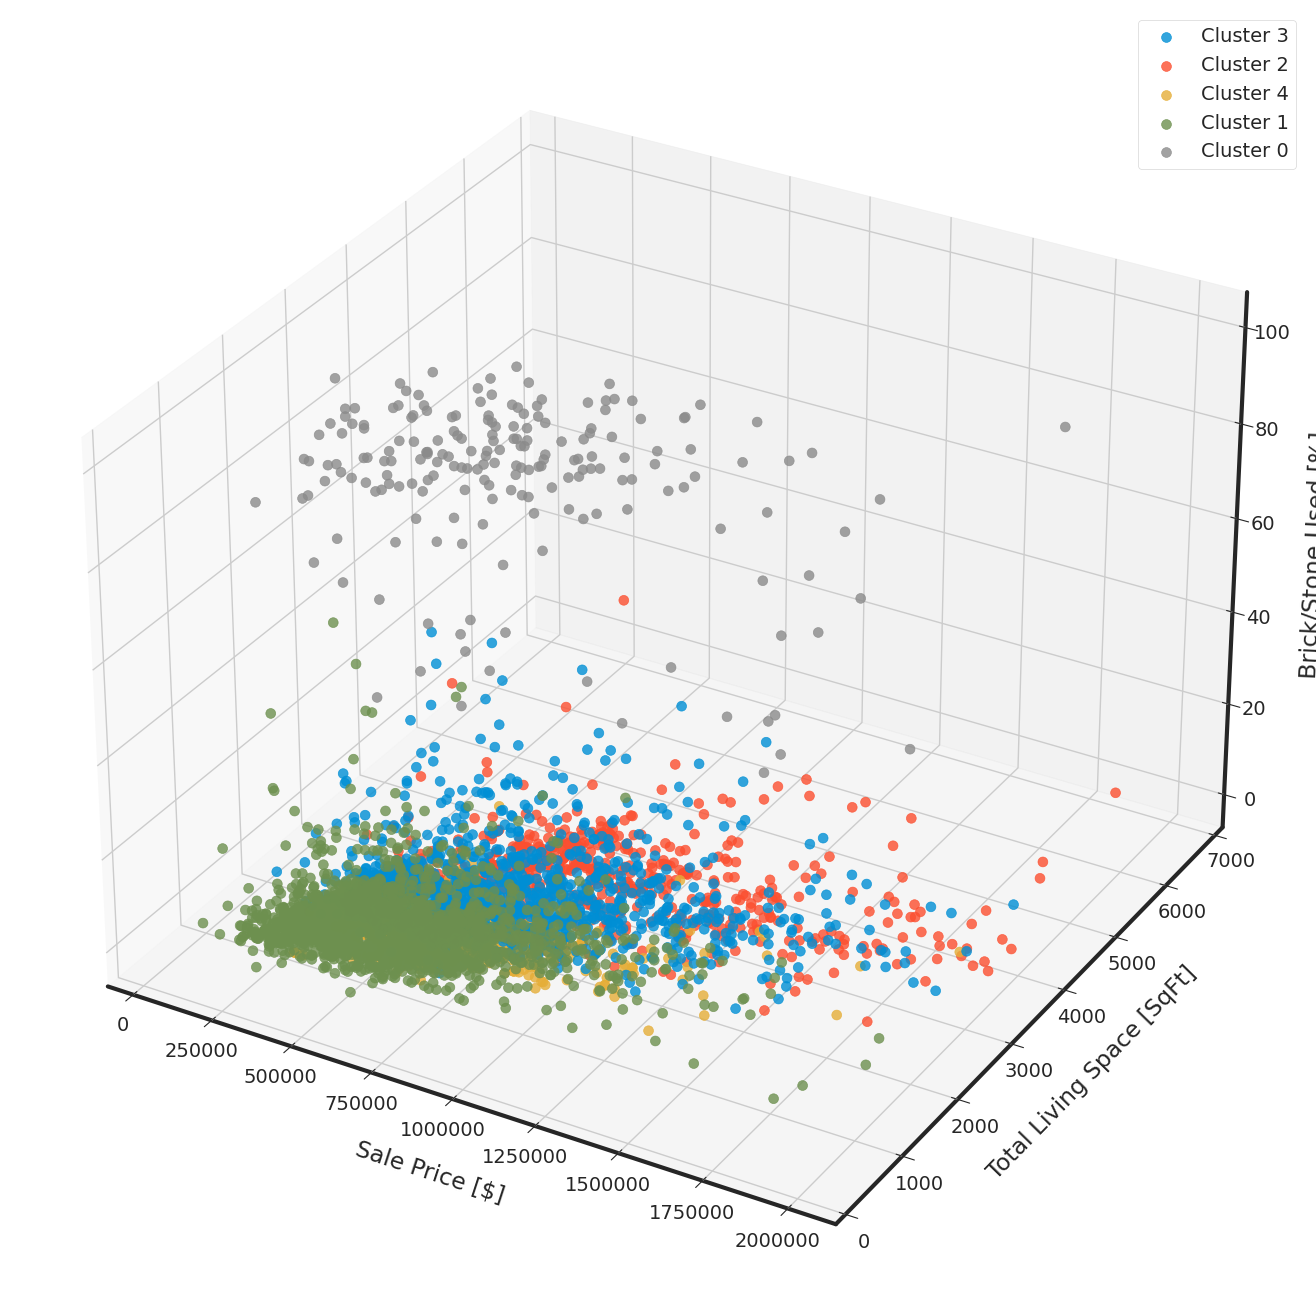

In [18]:
# Visualization 1: 3D Plot showing cluster differences
# Scatterplot with selected features of 'SalePrice', 'SqFtTotLiving', and 'BrickStone' and color code it based on the cluster.
x = df['SalePrice']
y = df['SqFtTotLiving']
z = df['BrickStone']
cl = df['cluster']

# set style
sns.set_style('white');

# Creating figure
fig = plt.figure(figsize = (16, 16))
ax = plt.axes(projection='3d')

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)


# Creating plot
for s in cl.unique():
    ax.scatter3D(x[df.cluster==s],y[df.cluster==s],z[df.cluster==s], label=s, alpha = 0.8, marker = 'o', s=50)

ax.ticklabel_format(useOffset=False, style='plain')
ax.set_xlabel('Sale Price [$]', labelpad=15)
ax.set_ylabel('Total Living Space [SqFt]', labelpad=15)
ax.set_zlabel('Brick/Stone Used [%]', labelpad=15)
ax.legend(['Cluster 3', 'Cluster 2', 'Cluster 4', 'Cluster 1', 'Cluster 0'])

# show plot
plt.show()

First 3D Plot Visualization Interpretation:
1. Cluster 0 primarily contains the homes that use a lot of brick/stone
2. Cluster 1 contains homes that have relatively lower sale prices and lower total living space
3. Cluster 2 contains homes that have the highest total living space
4. Cluster 3 contains homes that have a relatively moderate total living space with some brick/stone use
5. Cluster 4 contain homes that are relatively moderate in sale price and with a relatively smaller living space and no use of brick/stone


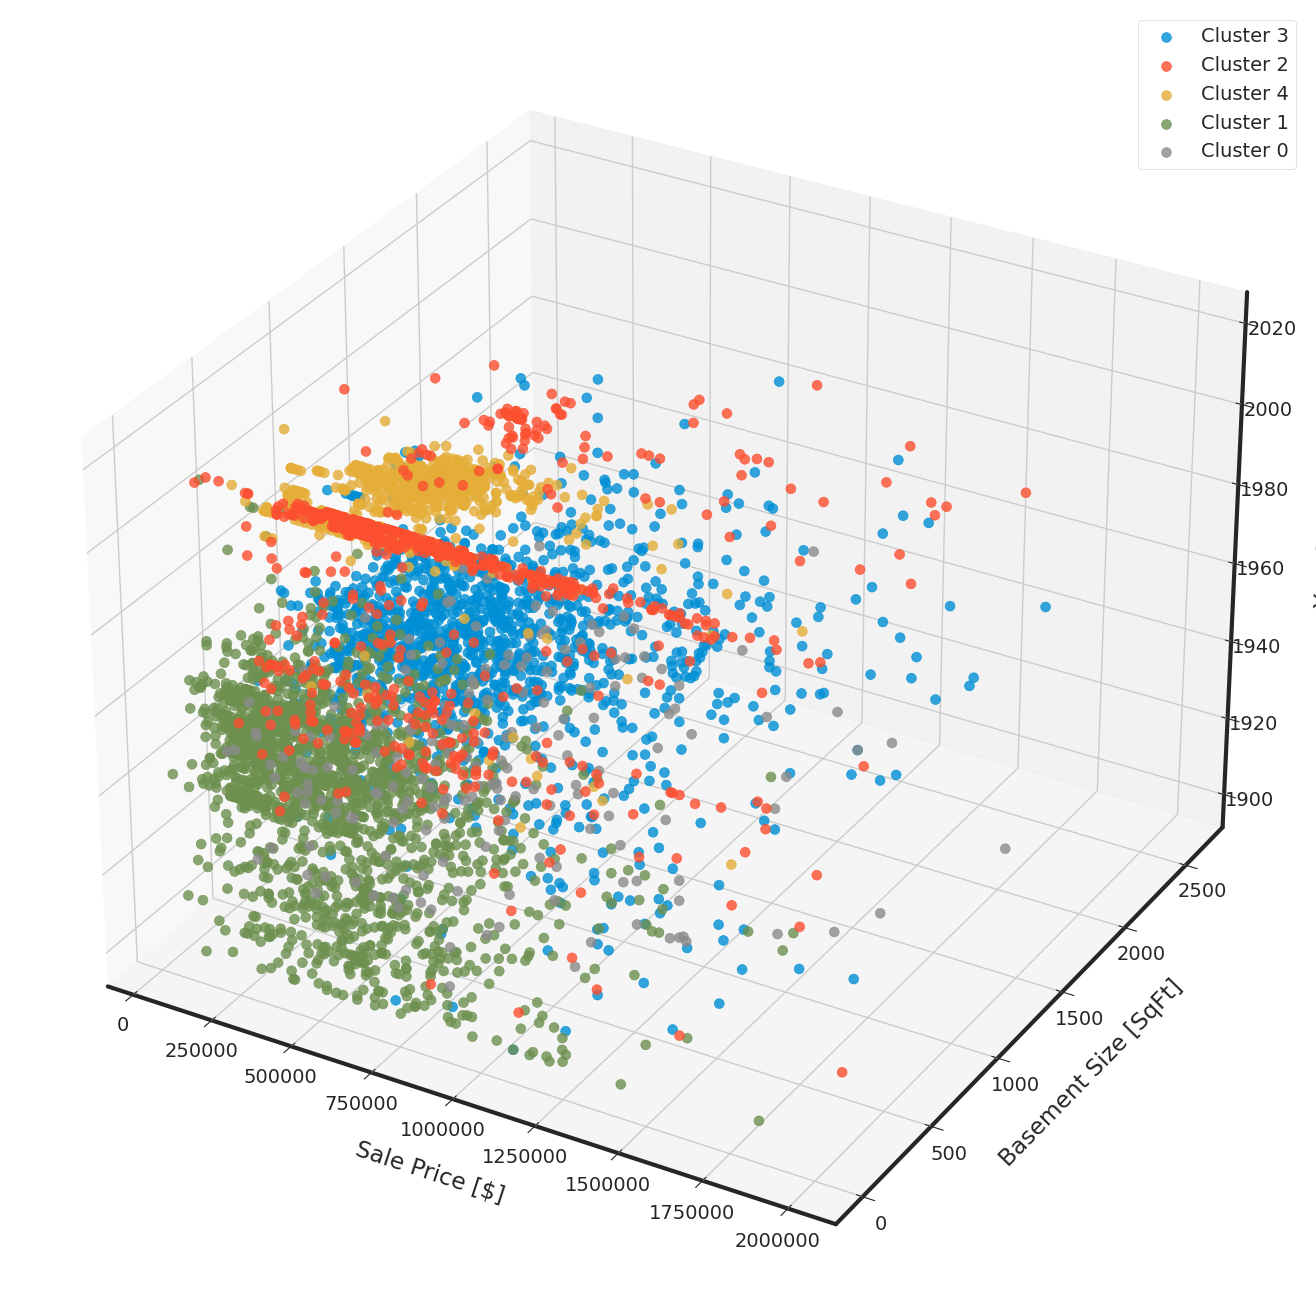

In [19]:
# Visualization 2: 3D Plot showing cluster differences
# Scatterplot with selected features of 'SalePrice', 'SqFtFinBasement', and 'YrBuilt' and color code it based on the cluster.
x = df['SalePrice']
y = df['SqFtFinBasement']
z = df['YrBuilt']
cl = df['cluster']

# set style
sns.set_style('white');

# Creating figure
fig = plt.figure(figsize = (16, 16))
ax = plt.axes(projection='3d')

# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)


# Creating plot
for s in cl.unique():
    ax.scatter3D(x[df.cluster==s],y[df.cluster==s],z[df.cluster==s], label=s, alpha = 0.8, marker = 'o', s=50)

ax.ticklabel_format(useOffset=False, style='plain')
ax.set_xlabel('Sale Price [$]', labelpad=15)
ax.set_ylabel('Basement Size [SqFt]', labelpad=15)
ax.set_zlabel('Year Built', labelpad=20)
ax.legend(['Cluster 3', 'Cluster 2', 'Cluster 4', 'Cluster 1', 'Cluster 0'])

# show plot
plt.show()

Second 3D Plot Visualization Interpretation:
1. Cluster 1 contains homes that have relatively lower sale prices and no or small basemet sizes
3. Cluster 2 contains homes that largely do not have basements and are newest
4. Cluster 3 contains homes that aer older and with more sizable basements
5. Cluster 4 contain homes that are least expensive, are relatively new, and which have a relatively large basement

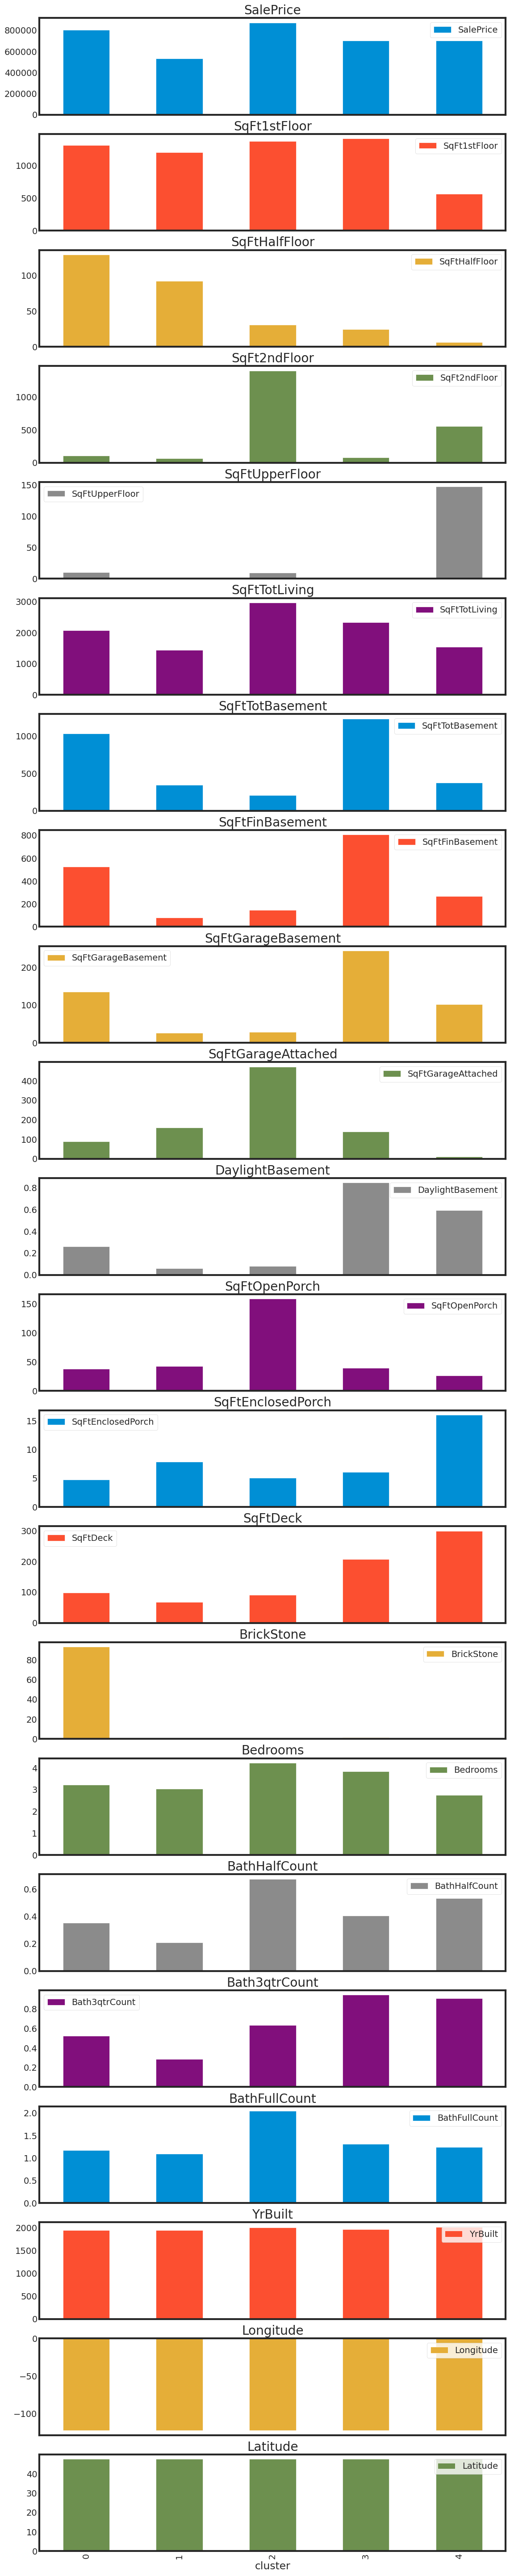

In [20]:
# Visualization 3: Bar graphs comparing the mean values of the various home features in each cluster
plt.rcParams["figure.figsize"] = [12,70]
cluster_groups2.plot(subplots=True, kind='bar');

Third Visualization Interpretation:
1. Cluster 0: Contains homes with brick/stone, relatively high sale price, older, low number of bedrooms and bathrooms
2. Cluster 1: Contains homes that are older, with the smallest square footage, the least expensive, and relatively few bedrooms and bathrooms
3. Cluster 2: Contains homes that are the most expensive, are relatively new, have the larges total living space and largest upper floor, smallest basement square footage, largest attached garages, largest open porches, small enclosed porches, small decks, and a large number of bedrooms and bathrooms
4. Cluster 3: Contain homes that were build mid-century, has relatively more bedrooms and bathrooms than that other homes, has relatively larger decks, have the largest basements, largest daylight basements, largest garage basements, and the largest first floors
5. Cluster 4: Contain the newest homes, the smallest first floors, the largest upper floors, have a high number of 3qtr bathrooms, have large decks and enclosed porches, and have relatively large daylight basements


#Part 2: Modeling Instructions:


###Part 2, Step 1: Load the new large dataset

In [21]:
# Load new large modeling dataset and add correct path
filename = 'option_A_modeling_df.csv'

df2 = pd.read_csv(filename)
df2.head()

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,...,MonthSold_07,MonthSold_08,MonthSold_09,MonthSold_10,MonthSold_11,MonthSold_12,YearSold_2017,YearSold_2018,YearSold_2019,YearSold_2020
0,400000,1590,0,0,0,3180,1590,1590,0,600,...,0,0,0,0,0,0,1,0,0,0
1,474250,1390,0,0,0,2200,810,810,0,0,...,0,0,0,0,0,0,0,1,0,0
2,667950,1010,0,1515,0,2525,0,0,0,400,...,0,0,0,0,0,0,0,0,1,0
3,659000,660,0,540,0,1820,620,620,0,0,...,0,0,1,0,0,0,1,0,0,0
4,656500,2310,0,0,0,2310,0,0,0,440,...,0,0,0,1,0,0,1,0,0,0


In [22]:
# View new dataset
display(df2.info())
display(df2.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4937 entries, 0 to 4936
Columns: 171 entries, SalePrice to YearSold_2020
dtypes: float64(2), int64(169)
memory usage: 6.4 MB


None

,SalePrice,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,SqFtGarageAttached,...,MonthSold_07,MonthSold_08,MonthSold_09,MonthSold_10,MonthSold_11,MonthSold_12,YearSold_2017,YearSold_2018,YearSold_2019,YearSold_2020
count,4.937000e+03,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,...,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000
mean,6.644969e+05,1176.440146,51.728378,348.925866,26.740531,1935.915333,595.723314,334.611708,102.511647,170.442576,...,0.082439,0.098440,0.087705,0.095605,0.091351,0.076767,0.246303,0.218756,0.270407,0.018230
std,2.979678e+05,445.949131,174.456092,544.743908,114.985746,764.987161,567.252633,422.990777,187.206721,239.709902,...,0.275060,0.297939,0.282894,0.294078,0.288137,0.266249,0.430901,0.413445,0.444215,0.133795
min,6.000000e+04,260.000000,0.000000,0.000000,0.000000,300.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.500000e+05,880.000000,0.000000,0.000000,0.000000,1390.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.308000e+05,1170.000000,0.000000,0.000000,0.000000,1770.000000,560.000000,110.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.890000e+05,1450.000000,0.000000,580.000000,0.000000,2360.000000,1070.000000,570.000000,190.000000,400.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.998000e+06,3600.000000,2000.000000,3010.000000,1220.000000,6695.000000,3070.000000,2620.000000,1090.000000,1830.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
# Check for missing data
df2.isnull().sum().sum()

0

In [24]:
# Check for duplicated rows
df2.duplicated().sum()

0

Note: There a no duplicated or missing values in this dataset. Also all data is numeric. There are 2 columns of float data and the rest are integers.

###Part 2, Step 2: This dataset is pre-cleaned, but may need to be processed before modeling

In [25]:
# Check first 85 columns
df2.iloc[:,0:86].columns

Index(['SalePrice', 'SqFt1stFloor', 'SqFtHalfFloor', 'SqFt2ndFloor',
       'SqFtUpperFloor', 'SqFtTotLiving', 'SqFtTotBasement', 'SqFtFinBasement',
       'SqFtGarageBasement', 'SqFtGarageAttached', 'DaylightBasement',
       'SqFtOpenPorch', 'SqFtEnclosedPorch', 'SqFtDeck', 'BrickStone',
       'Bedrooms', 'BathHalfCount', 'Bath3qtrCount', 'BathFullCount',
       'YrBuilt', 'PcntComplete', 'Longitude', 'Latitude', 'Golf Course',
       'Other Great Outdoors', 'Elementary School', 'General Entertainment',
       'Park', 'Mexican Restaurant', 'Vietnamese Restaurant', 'Gas Station',
       'Housing Development', 'Playground', 'Pool', 'Church', 'Dive Bar',
       'Convenience Store', 'Middle School', 'Grocery Store', 'Brewery', 'Bar',
       'Salon / Barbershop', 'Post Office', 'Beach', 'Lake', 'Medical Center',
       'Sandwich Place', 'Nail Salon', 'Pizza Place', 'Moving Target',
       'Building', 'Preschool', 'Library', 'Trail', 'Farm', 'Community Center',
       'High School', 'Gym 

In [26]:
# Check next 85 columns
df2.iloc[:,86:171].columns

Index(['Tennis Court', 'Chinese Restaurant', 'Furniture / Home Store',
       'Bus Line', 'Café', 'Event Space', 'Italian Restaurant',
       'Marijuana Dispensary', 'Office', 'Yoga Studio', 'Restaurant',
       'Baseball Field', 'Discount Store', 'Physical Therapist',
       'American Restaurant', 'Martial Arts Dojo', 'Spa', 'Storage Facility',
       'Daycare', 'General Travel', 'Burger Joint', 'Pet Service',
       'Thai Restaurant', 'Chiropractor', 'Bakery', 'Mobile Phone Shop',
       'Ice Cream Shop', 'Automotive Shop', 'Assisted Living',
       'Health & Beauty Service', 'Fried Chicken Joint', 'Taco Place',
       'Video Store', 'Financial or Legal Service', 'Massage Studio',
       'Asian Restaurant', 'Insurance Office', 'Japanese Restaurant', 'ATM',
       'Locksmith', 'Shipping Store', 'BldgGrade_4', 'BldgGrade_5',
       'BldgGrade_6', 'BldgGrade_7', 'BldgGrade_8', 'BldgGrade_9',
       'BldgGrade_10', 'BldgGrade_11', 'BldgGrade_12', 'FinBasementGrade_3',
       'FinBasement

In [27]:
feature_names = df2.columns.tolist()

for column in feature_names:
  print(column)
  print(df2[column].value_counts(dropna=False))

SalePrice
700000     65
650000     56
750000     48
550000     46
350000     46
           ..
259000      1
358500      1
1130000     1
317400      1
1214950     1
Name: SalePrice, Length: 1676, dtype: int64
SqFt1stFloor
1010    71
1300    58
1100    57
1090    56
1250    55
        ..
2780     1
2460     1
1145     1
1771     1
1126     1
Name: SqFt1stFloor, Length: 304, dtype: int64
SqFtHalfFloor
0       4443
500       17
700       13
420       13
600       12
        ... 
840        1
1080       1
441        1
728        1
130        1
Name: SqFtHalfFloor, Length: 114, dtype: int64
SqFt2ndFloor
0       3105
430       41
480       38
510       37
530       35
        ... 
2107       1
2060       1
441        1
2090       1
1126       1
Name: SqFt2ndFloor, Length: 235, dtype: int64
SqFtUpperFloor
0       4664
520       15
430       15
530       14
500       14
450       13
390       11
510       11
440       11
400       10
460        9
550        9
290        9
350        8
470      

Note: Businesses, Months Sold and Years Sold are one hot encoded. There are many other columns that appear to be a numeric classification or an ordinal values. These ordinal and one hot encoded values do not need scaling.  Only the original columns (used in the first dataset) need scaling.

In [28]:
# Define the feature matrix (X) and our target vector (y)
X = df2.drop(columns = 'SalePrice')
y = df2['SalePrice']

###Part 3, Step 3: Use random_state = 42 for your train_test_split

In [29]:
# Model Validation (Train Test Split)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [30]:
# Use Standard Scaler on data columns that are not already one hot encoded or appear to be ordinal values in training data only
# The columns needing standardscaler are: ['SalePrice', 'SqFt1stFloor', 'SqFtHalfFloor', 'SqFt2ndFloor',
#      'SqFtUpperFloor', 'SqFtTotLiving', 'SqFtTotBasement', 'SqFtFinBasement',
#       'SqFtGarageBasement', 'SqFtGarageAttached', 'DaylightBasement',
#       'SqFtOpenPorch', 'SqFtEnclosedPorch', 'SqFtDeck', 'BrickStone',
#       'Bedrooms', 'BathHalfCount', 'Bath3qtrCount', 'BathFullCount',
#       'YrBuilt', 'PcntComplete', 'Longitude', 'Latitude'

select_cols = ['SqFt1stFloor', 'SqFtHalfFloor', 'SqFt2ndFloor', 'SqFtUpperFloor',
               'SqFtTotLiving', 'SqFtTotBasement', 'SqFtFinBasement', 'SqFtGarageBasement', 'SqFtGarageAttached',
               'DaylightBasement','SqFtOpenPorch', 'SqFtEnclosedPorch', 'SqFtDeck', 'BrickStone', 'Bedrooms',
               'BathHalfCount', 'Bath3qtrCount', 'BathFullCount', 'YrBuilt', 'PcntComplete', 'Longitude', 'Latitude']

In [31]:
# Match pipe to columns
num_tuple = (scaler, select_cols)

In [32]:
# Make column Transformer
col_trans = make_column_transformer(num_tuple, remainder = 'passthrough')
col_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 ['SqFt1stFloor', 'SqFtHalfFloor',
                                  'SqFt2ndFloor', 'SqFtUpperFloor',
                                  'SqFtTotLiving', 'SqFtTotBasement',
                                  'SqFtFinBasement', 'SqFtGarageBasement',
                                  'SqFtGarageAttached', 'DaylightBasement',
                                  'SqFtOpenPorch', 'SqFtEnclosedPorch',
                                  'SqFtDeck', 'BrickStone', 'Bedrooms',
                                  'BathHalfCount', 'Bath3qtrCount',
                                  'BathFullCount', 'YrBuilt', 'PcntComplete',
                                  'Longitude', 'Latitude'])])

###Part 2, Step 4: Apply PCA to reduce the number of features.
>Compare how many columns are present before and after PCA

In [33]:
# Feature Extraction for dimensionality reduction of dataset 2 using Principle Component Analysis (PCA)

# Instantiate PCA with retention of 95% of the variance in the original features
pca = PCA(n_components = .95)

# Combine the column transformer with the PCA using a pipeline
pca_pipe = make_pipeline(col_trans, pca)

# View the column count before and after PCA
print('Shape before PCA:', X_train.shape)
print('Shape after PCA:', pca_pipe.fit_transform(X_train).shape)
print('Column count reduced by: ', X_train.shape[1] - pca_pipe.fit_transform(X_train).shape[1])

Shape before PCA: (3702, 170)
Shape after PCA: (3702, 95)
Column count reduced by:  75


Note: The dimensionality reduction using PCA reduced the number of columns from 170 to 95, while keeping 95% of the variance in the the original data

###Part 2, Step 5: Do not leak data

In [34]:
# Scale the X_train data by fitting and transforming with the scaler pipeline. Only transform the X_test data but do not fit it to prevent data leakage.
X_train_scal_pca = pca_pipe.fit_transform(X_train)
X_test_scal_pca = pca_pipe.transform(X_test)

# Transform data arrays into dataframes
X_train_scal_pca_df = pd.DataFrame(X_train_scal_pca)
X_test_scal_pca_df = pd.DataFrame(X_test_scal_pca)

# View head of scaled dataframes
display(X_train_scal_pca_df.head())
display(X_test_scal_pca_df.head())

,0,1,2,3,4,5,6,7,8,9,...,85,86,87,88,89,90,91,92,93,94
0,-0.991715,0.824996,0.208664,-0.921339,-0.568602,-1.090879,0.278038,-0.822313,0.562395,-0.371179,...,0.320564,-0.083159,0.237982,0.268423,0.158076,0.420124,-0.004886,-0.020132,0.274476,0.143204
1,-2.699627,-0.608635,-1.159813,-0.624173,-0.702773,0.031859,0.568517,0.331794,0.029326,-0.354792,...,-0.274140,0.246445,0.058540,0.258978,0.146139,0.231186,0.187853,0.012985,-0.080382,-0.129559
2,-1.441274,0.456213,-1.693088,1.873353,0.182582,-0.466071,0.862034,-0.815613,-0.079372,-0.324049,...,0.027168,0.418808,-0.144093,0.132710,-0.012501,-0.216146,-0.005241,-0.090917,0.103071,-0.020302
3,-0.092645,1.196137,-0.493369,-1.440482,0.162615,0.409129,0.926083,0.931691,-0.565786,0.151730,...,0.077490,0.050159,0.306687,-0.051735,0.085456,0.049489,-0.286925,0.008117,0.110456,0.153953
4,1.546724,-2.634284,0.578877,0.851847,-0.758406,0.154948,-0.823891,-0.621478,-0.289951,-0.301365,...,-0.214762,-0.317484,-0.026906,-0.130235,0.185562,0.247063,-0.182646,-0.104113,-0.053508,-0.026370


,0,1,2,3,4,5,6,7,8,9,...,85,86,87,88,89,90,91,92,93,94
0,-1.718444,-0.420385,-0.892493,0.406429,0.440812,-0.146347,-0.189210,-0.711898,-0.819984,-0.594489,...,-0.052622,-0.162265,-0.164487,-0.173731,0.066013,0.267438,0.457001,-0.142810,0.414798,0.255993
1,-0.633869,2.382287,0.054712,-1.060710,-0.832125,-0.796088,0.565687,-0.899353,0.572489,-0.396803,...,-0.064260,-0.247971,0.062105,0.192933,-0.024548,0.011577,-0.169649,-0.202011,-0.096170,-0.146490
2,0.952014,-1.663715,-2.410922,-1.175301,-0.002639,0.714543,-0.912349,-0.209919,-0.206145,1.456970,...,-0.070326,0.253843,0.158278,0.057116,-0.108629,-0.090140,0.171964,-0.059889,0.020418,0.029690
3,-1.865544,0.270383,2.608271,-1.025128,0.411902,0.424176,0.673850,0.134306,0.768538,-0.925768,...,-0.252504,0.245851,0.041515,0.161492,0.030345,-0.189539,0.053788,-0.038855,0.009613,0.013091
4,-1.157603,0.796713,2.753239,-0.374404,0.566505,0.025168,0.254179,-0.501032,-0.809857,-0.871063,...,-0.438246,-0.200470,-0.041142,0.077166,0.816728,-0.229807,-0.070714,-0.100201,0.207861,-0.256235


###Part 2, Step 6: Use a deep learning model to predict the selling price of the houses.
>Create 3 different versions of a sequential model.
>>Each new model should be an iteration on the previous model.
>>Justify in writing why you changed what you did for each new model. (For example, why did you add layers, regularization, nodes, etc)

>Use some form of regularization with at least one model.

>Evaluate each model with appropriate metrics.

In [35]:
# This function will show the performance of the model over each epoch
def plot_history(history, metric=None):
  fig, axes = plt.subplots(1,2, figsize = (10,5))
  axes[0].plot(history.history['loss'], label = "train")
  axes[0].plot(history.history['val_loss'], label='test')
  axes[0].set_title('Loss')
  axes[0].legend()
  if metric:
    axes[1].plot(history.history[metric], label = 'train')
    axes[1].plot(history.history['val_' + metric], label = 'test')
    axes[1].set_title(metric)
    axes[1].legend()

  plt.show()

####Sequential Model #1: One hidden layers with 95 nodes in the 1st and only hidden layer

In [36]:
# Step 1: Define the network structure
# Save the number of features we have as our input shape
input_shape = X_train_scal_pca_df.shape[1]
input_shape

95

In [37]:
# Instantiate Sequential model
model = Sequential()

In [38]:
# One hidden layers
model.add(Dense(95, # Number of neurons in first hidden layer
                input_dim = input_shape, # Shape of input features (number of columns)
                activation = 'relu')) # Activation function we are using, in this case linear because we are modeling a regression question
# Output layer (I will choose linear activation for the output layer as it is a linear regression problem so I don't need to define an activation function)
model.add(Dense(1))

In [39]:
# Step 2: Compile (we use mse loss function for linear regression problems)
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mae'])

In [40]:
# Step 3: Fit our model
history = model.fit(X_train_scal_pca_df, y_train,
                    validation_data = (X_test_scal_pca_df, y_test),
                    epochs=200)

Epoch 1/200
116/116 [==============================] - 1s 5ms/step - loss: 531713753088.0000 - mae: 665200.8125 - val_loss: 526138834944.0000 - val_mae: 662377.3125
Epoch 2/200
116/116 [==============================] - 0s 2ms/step - loss: 531703889920.0000 - mae: 665194.3750 - val_loss: 526125137920.0000 - val_mae: 662368.3125
Epoch 3/200
116/116 [==============================] - 0s 2ms/step - loss: 531684589568.0000 - mae: 665181.7500 - val_loss: 526099709952.0000 - val_mae: 662351.8750
Epoch 4/200
116/116 [==============================] - 0s 2ms/step - loss: 531651395584.0000 - mae: 665161.1875 - val_loss: 526058979328.0000 - val_mae: 662326.2500
Epoch 5/200
116/116 [==============================] - 0s 2ms/step - loss: 531601948672.0000 - mae: 665130.5000 - val_loss: 526001995776.0000 - val_mae: 662290.6250
Epoch 6/200
116/116 [==============================] - 0s 2ms/step - loss: 531535265792.0000 - mae: 665089.8125 - val_loss: 525927972864.0000 - val_mae: 662244.8125
Epoch 7/20

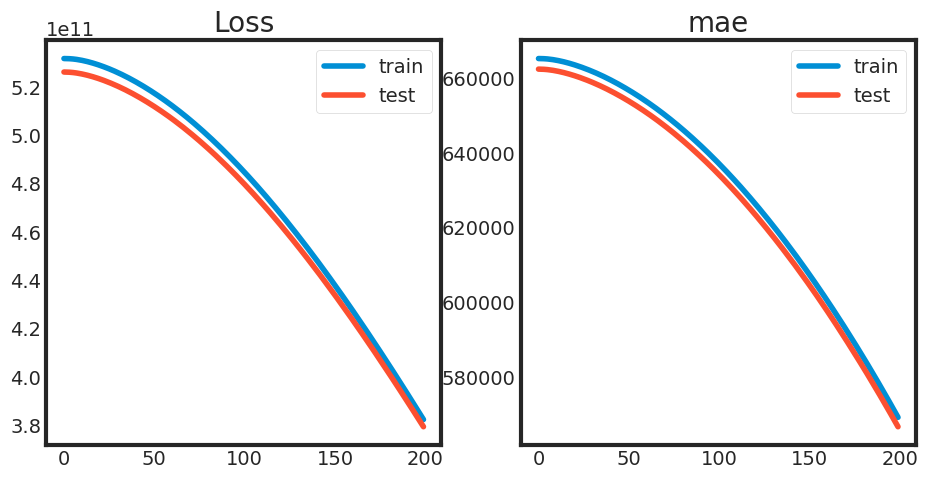

In [41]:
# Apply plotting function to see how the model is doing
plot_history(history, 'mae')

Note: The first model is very similar between training and testing data and is not overfit. The model has not bottomed out and therefore could undergo more epochs. I will also try more hidden layers and more nodes in the next model to see if that helps with the loss flattening out faster.

Note: Model 1 with 2 hidden layers performed pretty well as seen with the loss function of both the training and testing datasets decreasing and converging. This model is not overfit at 35 epochs but after 35 epochs it begins to diverge with the training data continuing to decrease and the testing data staying flat or perhaps slowly increasing.

####Sequential Model #2: Two hidden layers with 95 nodes in the 1st layer and 15 nodes in the second layer. I will also let the model run longer with 500 epochs.
>This next model was to evaluate if increasing the hidden layers and number of nodes would improve the model.

In [42]:
# Step 1: Define the network structure
# Save the number of features we have as our input shape
input_shape = X_train_scal_pca_df.shape[1]
input_shape

95

In [43]:
# Instantiate Sequential model
model = Sequential()

In [44]:
# Two hidden layers
model.add(Dense(95, # Number of neurons in first hidden layer
                input_dim = input_shape, # Shape of input features (number of columns)
                activation = 'relu')) # Activation function we are using, in this case linear because we are modeling a regression question
model.add(Dense(15, # Number of neurons in first hidden layer
                activation = 'relu')) # Activation function we are using, in this case linear because we are modeling a regression question
# Output layer (I will choose linear activation for the output layer as it is a linear regression problem so I don't need to define an activation function)
model.add(Dense(1))

In [45]:
# Step 2: Compile (we use mse loss function for linear regression problems)
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mae'])

In [46]:
#Fit our model
history = model.fit(X_train_scal_pca_df, y_train,
                    validation_data = (X_test_scal_pca_df, y_test),
                    epochs=500)

Epoch 1/500
116/116 [==============================] - 2s 3ms/step - loss: 531708313600.0000 - mae: 665196.4375 - val_loss: 526121041920.0000 - val_mae: 662364.8125
Epoch 2/500
116/116 [==============================] - 0s 2ms/step - loss: 531642515456.0000 - mae: 665153.2500 - val_loss: 525991608320.0000 - val_mae: 662279.5000
Epoch 3/500
116/116 [==============================] - 0s 3ms/step - loss: 531385909248.0000 - mae: 664988.8750 - val_loss: 525580959744.0000 - val_mae: 662017.3125
Epoch 4/500
116/116 [==============================] - 0s 2ms/step - loss: 530754928640.0000 - mae: 664596.5000 - val_loss: 524725846016.0000 - val_mae: 661479.6875
Epoch 5/500
116/116 [==============================] - 0s 3ms/step - loss: 529587798016.0000 - mae: 663879.6250 - val_loss: 523278090240.0000 - val_mae: 660578.9375
Epoch 6/500
116/116 [==============================] - 0s 2ms/step - loss: 527769010176.0000 - mae: 662762.8125 - val_loss: 521142501376.0000 - val_mae: 659256.6875
Epoch 7/50

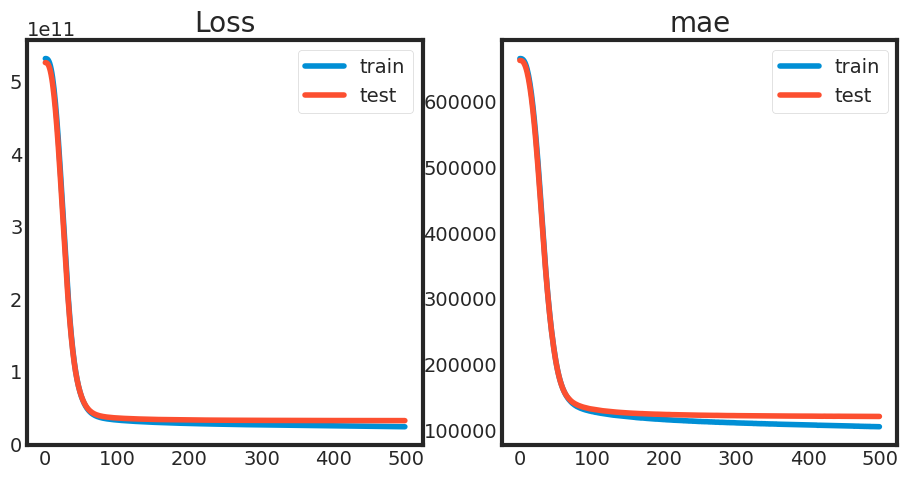

In [47]:
# Apply plotting function to see how the model is doing
plot_history(history, 'mae')

Note 2: This model performed much better as it bottomed out in training before 100 epochs. Beyond 100 epochs the testing data seems to remain flat yet the training data starts be become overfit. For the third model I will employ both a dropout between hidden layers and a early stopping regularization to terminate the training if the model becomes worse.

####Sequential Model #3: Two hidden layers with 95 nodes in the 1st layer, 15 in the second layer, with drop out regularization between runs and employing EarlyStopping, with only 200 epochs.

In [48]:
# Step 1: Define the network structure
# Save the number of features we have as our input shape
input_shape = X_train_scal_pca_df.shape[1]
input_shape

95

In [49]:
# Instantiate Sequential model
model = Sequential()

In [50]:
# Two hidden layers
model.add(Dense(95, # Number of neurons in first hidden layer
                input_dim = input_shape, # Shape of input features (number of columns)
                activation = 'relu')) # Activation function we are using, in this case linear because we are modeling a regression question
model.add(Dropout(.3))
model.add(Dense(15, # Number of neurons in first hidden layer
                activation = 'relu')) # Activation function we are using, in this case linear because we are modeling a regression question
# Output layer (I will choose linear activation for the output layer as it is a linear regression problem so I don't need to define an activation function)
model.add(Dense(1))

In [51]:
# Step 2: Compile (we use mse loss function for linear regression problems)
model.compile(loss = 'mse', optimizer = 'adam', metrics = ['mae'])
monitor_val_acc = EarlyStopping(monitor = 'val_loss', patience = 5)

In [52]:
# Step 3: Fit our model
history3 = model.fit(X_train_scal_pca_df, y_train,
                    validation_data = (X_test_scal_pca_df, y_test),
                    epochs=200, callbacks=[monitor_val_acc])

Epoch 1/200
116/116 [==============================] - 1s 3ms/step - loss: 531709984768.0000 - mae: 665197.7500 - val_loss: 526126088192.0000 - val_mae: 662367.9375
Epoch 2/200
116/116 [==============================] - 0s 2ms/step - loss: 531659587584.0000 - mae: 665163.3125 - val_loss: 526028472320.0000 - val_mae: 662302.2500
Epoch 3/200
116/116 [==============================] - 0s 2ms/step - loss: 531471925248.0000 - mae: 665041.1250 - val_loss: 525732741120.0000 - val_mae: 662109.4375
Epoch 4/200
116/116 [==============================] - 0s 2ms/step - loss: 531031031808.0000 - mae: 664759.1250 - val_loss: 525135708160.0000 - val_mae: 661727.0625
Epoch 5/200
116/116 [==============================] - 0s 2ms/step - loss: 530225430528.0000 - mae: 664252.6875 - val_loss: 524139298816.0000 - val_mae: 661095.6250
Epoch 6/200
116/116 [==============================] - 0s 2ms/step - loss: 528976576512.0000 - mae: 663476.6250 - val_loss: 522667196416.0000 - val_mae: 660169.2500
Epoch 7/20

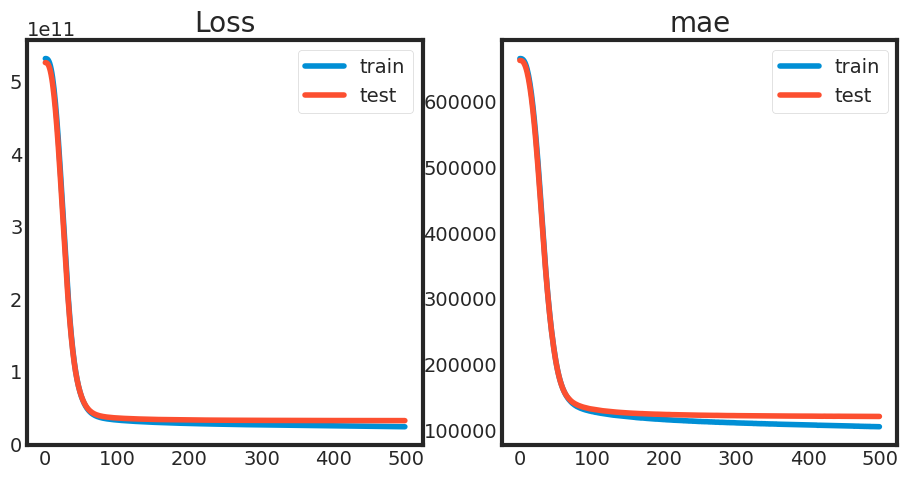

In [53]:
# Apply plotting function to see how the model is doing
plot_history(history, 'mae')

Note: The early stopping was not necessary as it was not triggered. The Dropout also seemed to not change the loss history from model 2 much.

###Part 2, Step 7: Choose a final model and justify your choice.

I select Model 3 as my final model because it is my fastest model, is not too terribly overfit and uses drop out to help minimize overfitting.

###Part 2, Step 8: Evaluate your final model with multiple metrics.

In [54]:
# Make predictions and evaluate your model - RMSE
train_preds = model.predict(X_train_scal_pca_df)
test_preds = model.predict(X_test_scal_pca_df)

print('training rmse:', np.sqrt(mean_squared_error(y_train, train_preds)))
print('testing rmse:', np.sqrt(mean_squared_error(y_test, test_preds)))

39/39 [==============================] - 0s 919us/step
training rmse: 171911.48464186565
testing rmse: 183921.39402080508


In [55]:
# Make predictions and evaluate your model - R2
train_preds = model.predict(X_train_scal_pca_df)
test_preds = model.predict(X_test_scal_pca_df)

print('training R2:', r2_score(y_train, train_preds))
print('testing R2:', r2_score(y_test, test_preds))

39/39 [==============================] - 0s 1ms/step
training rmse: 0.6687645346326576
testing rmse: 0.6129442582361384


Overall the model was not very accurate in it's prediction. The R2 was around 60% and the RMSE shows that predictions can be off by over $160K which means that more work could be done on the model to improve it's accuracy.  

###Part 2, Step 9: Based on those metrics, explain in writing how well your model will solve the business problem.

Overall the model was not very accurate in it's prediction. The R2 was around 60% and the RMSE shows that predictions can be off by over $160K which means that more work could be done on the model to improve it's accuracy.  